<a href="https://colab.research.google.com/github/causallycausal/fastai/blob/chap4-dev/mnist_playground.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#hide
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 727kB 17.7MB/s 
     |████████████████████████████████| 1.2MB 42.3MB/s 
     |████████████████████████████████| 194kB 58.1MB/s 
     |████████████████████████████████| 51kB 9.2MB/s 
     |████████████████████████████████| 61kB 10.7MB/s 
Mounted at /content/gdrive


In [3]:
#hide
from fastai.vision.all import *
from fastbook import *

matplotlib.rc('image', cmap='Greys')

In [4]:
#TODO: 
# Create the baseline model?
# Create train and test data sets 

# Download the entire MINST 
path = untar_data(URLs.MNIST)


In [5]:
path.ls()

(#2) [Path('/root/.fastai/data/mnist_png/testing'),Path('/root/.fastai/data/mnist_png/training')]

In [6]:
(path/'training').ls().sorted()

(#10) [Path('/root/.fastai/data/mnist_png/training/0'),Path('/root/.fastai/data/mnist_png/training/1'),Path('/root/.fastai/data/mnist_png/training/2'),Path('/root/.fastai/data/mnist_png/training/3'),Path('/root/.fastai/data/mnist_png/training/4'),Path('/root/.fastai/data/mnist_png/training/5'),Path('/root/.fastai/data/mnist_png/training/6'),Path('/root/.fastai/data/mnist_png/training/7'),Path('/root/.fastai/data/mnist_png/training/8'),Path('/root/.fastai/data/mnist_png/training/9')]

In [7]:
digits = []
for i in range(10):
  digits.append((path/f'training/{i}').ls().sorted())

In [8]:
example_zero = digits[0][0]
example_zero

Path('/root/.fastai/data/mnist_png/training/0/1.png')

In [9]:
img0 = Image.open(example_zero)
img0

In [10]:
def print_total(dataset):
  total = 0 
  for i in range(10): 
    num_digits = len(dataset[i])
    print(f"Number of {i} digits: {num_digits}")
    total += num_digits

  print(f"The total number of digits: {total}")

print_total(digits)

Number of 0 digits: 5923
Number of 1 digits: 6742
Number of 2 digits: 5958
Number of 3 digits: 6131
Number of 4 digits: 5842
Number of 5 digits: 5421
Number of 6 digits: 5918
Number of 7 digits: 6265
Number of 8 digits: 5851
Number of 9 digits: 5949
The total number of digits: 60000


In [11]:
img0_t = tensor(img0)
df = pd.DataFrame(img0_t)
df.style.set_properties(**{'font-size':'6pt'}).background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,51,159,253,159,50,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,48,238,252,252,252,237,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,54,227,253,252,239,233,252,57,6,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,10,60,224,252,253,252,202,84,252,253,122,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,163,252,252,252,253,252,252,96,189,253,167,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,51,238,253,253,190,114,253,228,47,79,255,168,0,0,0,0,0,0


## First Try: Pixel Similarity

In [12]:
# Load the data in pytorch tensors  
def load_img_tensors(images):
  image_tensors = []
  for i in range(len(images)):
    image_tensors.append([tensor(Image.open(o)) for o in images[i]])
  
  return image_tensors

In [13]:
image_tensors = load_img_tensors(digits)

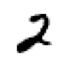

In [14]:
show_image(image_tensors[2][0])

matplotlib.axes._subplots.AxesSubplot

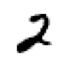

In [15]:
type(show_image(image_tensors[2][0]))

In [16]:
type(image_tensors[0]), type(image_tensors[0][0])

(list, torch.Tensor)

In [17]:
# Stack images along the same axis.
# Should only be run once on images being passed through 
def stack_images(images): 
  for i in range(len(images)): 
    images[i] = torch.stack(images[i])

  return images


In [18]:
stacked_images = stack_images(image_tensors)

In [19]:
# Transform images to floats for easier computation 
def img_to_float(images): 
  for i in range(len(images)): 
    images[i] = images[i].float()/255

  return images 

In [20]:
train_x = img_to_float(stacked_images)

In [21]:
# Calculate the mean "ideal" image
def calculate_ideal(images): 
  ideal_image = [] 
  for i in range(len(images)):
     ideal_image.append(images[i].mean(0))
  
  return ideal_image

In [22]:
ideal_image = calculate_ideal(train_x)

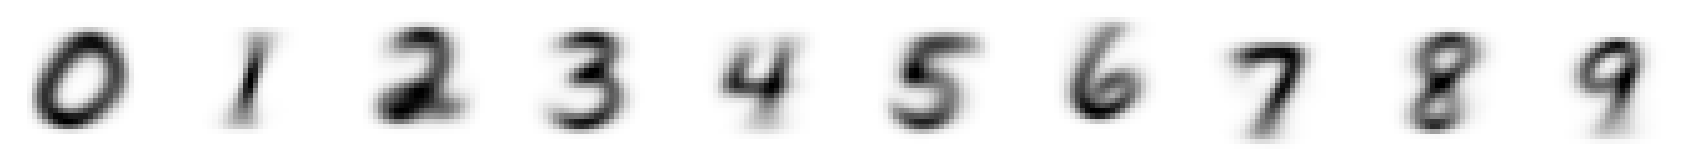

In [23]:
show_images(ideal_image)

In [24]:
#TODO: 
# 1. Finish baseline multiclassification model 
# 2. One-vs-all with linear 
# model_0: zero vs not zero 
# model_1: one vs not one 
# model_2: two vs not two
# 3. resnet18 - a few others 
# 4. Hyperparameter tuning 
# soft-max 

# Within digit varbility of the centroids and across digit varibility 

In [25]:
train_x[0].ndim, train_x[0].shape

(3, torch.Size([5923, 28, 28]))

In [43]:
# Calculate the average absolute distance between a and b  
def mnist_distance(a,b): 
  return (a-b).abs().mean((-1, -2))

# Calculate distance between image and ideal_images 
def calculate_distance(image, ideal_images):
  distances = []
  for img in ideal_images: 
    distances.append(mnist_distance(image, img))
  return distances

# For each image in images, calculate the distance between it and the ideal_images
def calculate_all_distances(images, ideal_images):
  distances = []
  for image in images: 
    distances.append([calculate_distance(img, ideal_images) for img in image])
  return distances

# Classify every digit 
def classify_digit(distances):
  classifications = []
  for distance in distances: 
    classifications.append([dist.index(min(dist)) for dist in distance])
  return classifications



In [41]:
img = train_x[0][0]
img[1]

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [45]:
b = calculate_distance(train_x[0][0], ideal_image)
b

[tensor(0.1108),
 tensor(0.1643),
 tensor(0.1788),
 tensor(0.1679),
 tensor(0.1765),
 tensor(0.1488),
 tensor(0.1651),
 tensor(0.1690),
 tensor(0.1708),
 tensor(0.1694)]

In [44]:
z = calculate_distance(train_x[0][0], ideal_image)
z

[tensor(0.1108),
 tensor(0.1643),
 tensor(0.1788),
 tensor(0.1679),
 tensor(0.1765),
 tensor(0.1488),
 tensor(0.1651),
 tensor(0.1690),
 tensor(0.1708),
 tensor(0.1694)]

In [46]:
%%time
a = calculate_all_distances(train_x, ideal_image)

CPU times: user 11.2 s, sys: 34.1 ms, total: 11.3 s
Wall time: 11.3 s


In [29]:
len(a), a[0][0]

(10,
 [tensor(0.1734),
  tensor(0.0760),
  tensor(0.1490),
  tensor(0.1415),
  tensor(0.1355),
  tensor(0.2111),
  tensor(0.2232),
  tensor(0.2348),
  tensor(0.2525),
  tensor(0.2369)])

In [30]:
stuf = classify_digit(a)
stuf[5][50], calculate_distance(train_x[5][50], ideal_image)

(1,
 [tensor(0.1734),
  tensor(0.0760),
  tensor(0.1490),
  tensor(0.1415),
  tensor(0.1214),
  tensor(0.1287),
  tensor(0.1373),
  tensor(0.1617),
  tensor(0.3340),
  tensor(0.3342)])

In [31]:
for i in stuf: 
  print(f"Count of 1: {i.count(1)} and size of array {len(i)}.")

Count of 1: 5923 and size of array 5923.
Count of 1: 6742 and size of array 6742.
Count of 1: 5957 and size of array 5958.
Count of 1: 6131 and size of array 6131.
Count of 1: 5842 and size of array 5842.
Count of 1: 5421 and size of array 5421.
Count of 1: 5908 and size of array 5918.
Count of 1: 6265 and size of array 6265.
Count of 1: 5851 and size of array 5851.
Count of 1: 5949 and size of array 5949.


In [32]:
stuf[3][5]

1

In [33]:
distances = calculate_distance(train_x, ideal_image)

In [34]:
a = [dist[0] for dist in distances]
a, min(a)


([tensor(0.1108),
  tensor(0.0530),
  tensor(0.1350),
  tensor(0.1074),
  tensor(0.1226),
  tensor(0.1334),
  tensor(0.1074),
  tensor(0.1095),
  tensor(0.1197),
  tensor(0.1066)],
 tensor(0.0530))

In [35]:

type(distances[:]), distances[:], train_x[0].shape

(list,
 [tensor([0.1108, 0.1388, 0.1648,  ..., 0.1840, 0.1632, 0.1759]),
  tensor([0.0530, 0.0601, 0.0636,  ..., 0.0658, 0.0737, 0.0519]),
  tensor([0.1350, 0.1243, 0.1412,  ..., 0.1273, 0.1540, 0.1375]),
  tensor([0.1074, 0.1114, 0.1100,  ..., 0.1316, 0.1220, 0.1267]),
  tensor([0.1226, 0.1126, 0.0990,  ..., 0.1302, 0.1485, 0.0961]),
  tensor([0.1334, 0.1307, 0.1357,  ..., 0.1342, 0.1350, 0.1338]),
  tensor([0.1074, 0.1823, 0.1126,  ..., 0.1155, 0.1271, 0.1320]),
  tensor([0.1095, 0.1304, 0.1328,  ..., 0.1147, 0.1239, 0.0937]),
  tensor([0.1197, 0.1959, 0.1252,  ..., 0.1110, 0.1156, 0.1399]),
  tensor([0.1066, 0.1185, 0.0990,  ..., 0.1070, 0.1056, 0.0922])],
 torch.Size([5923, 28, 28]))

In [36]:
mnist_distance(train_x[0], ideal_image[0])

tensor([0.1108, 0.1388, 0.1648,  ..., 0.1840, 0.1632, 0.1759])

In [37]:
def check_digit(prediction, label):
  pass

In [38]:
mnist_distance(train_x[0], ideal_image[0])

tensor([0.1108, 0.1388, 0.1648,  ..., 0.1840, 0.1632, 0.1759])